# Data Analysis
In the following is a thoriugh analysis of the data inorder to better understand it

### Importing Libraries

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

### Displaying Sample Dataset

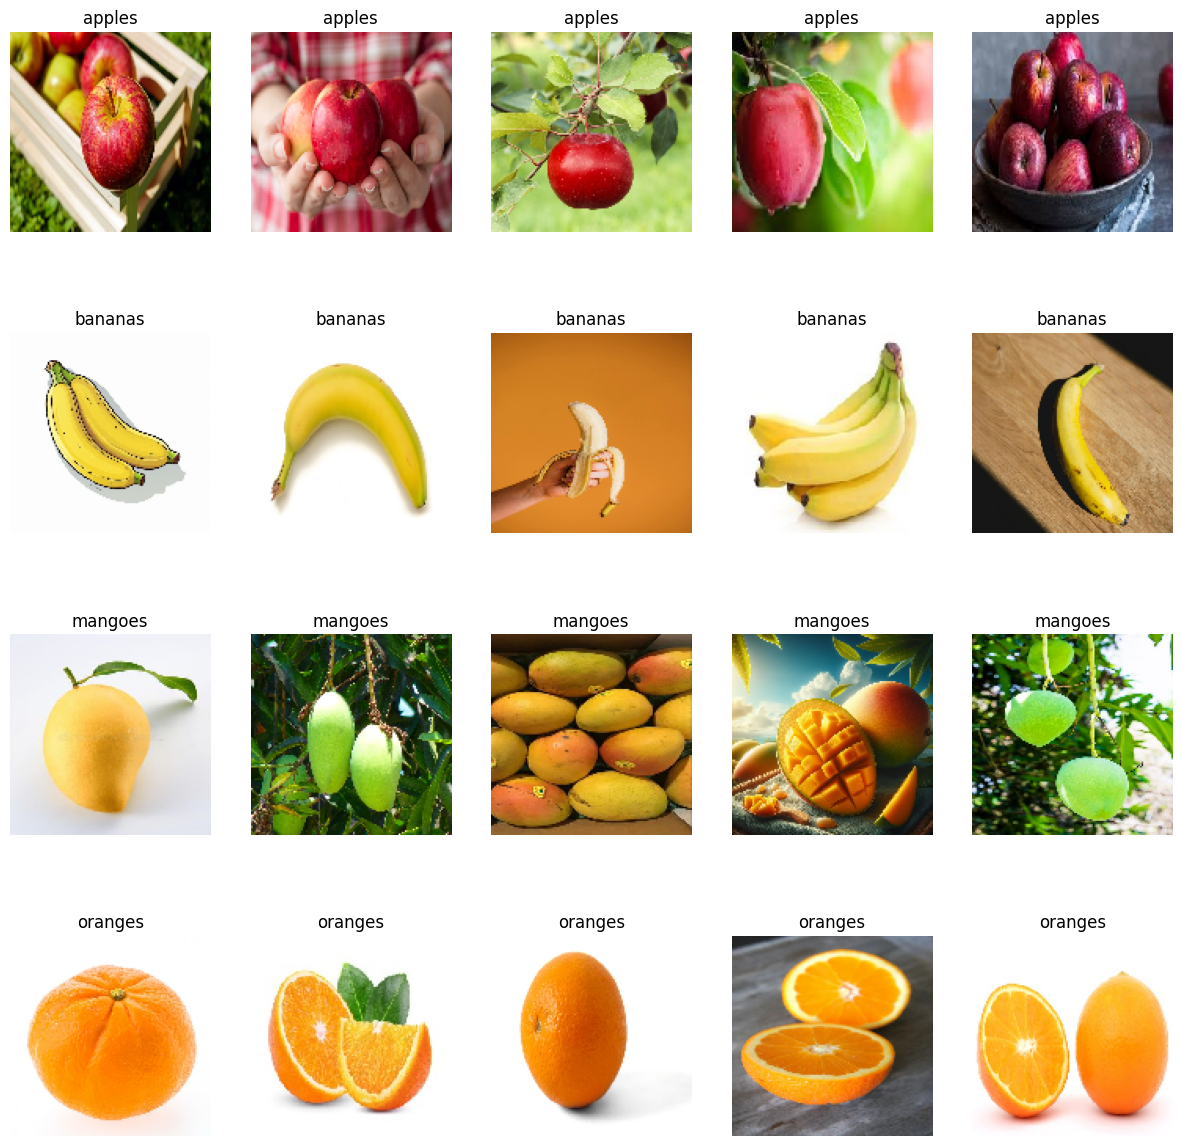

In [49]:
def display_random_images(data_dir, class_names, num_images=5):
    plt.figure(figsize=(15, 15))
    image_count = 0

    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        random_images = random.sample(images, min(num_images, len(images)))
        for img_path in random_images:
            img = load_img(img_path, target_size=(128, 128))
            plt.subplot(len(class_names), num_images, image_count + 1)
            plt.axis('off')
            plt.title(f'{class_name}')
            plt.imshow(img)
            image_count += 1
    plt.show()

class_names = ['apples', 'bananas', 'mangoes', 'oranges']

# data_dir = 'fruit_dataset/Train'  # Adjust this path to your test data directory
data_dir = 'data'  # Adjust this path to your test data directory
display_random_images(data_dir, class_names)


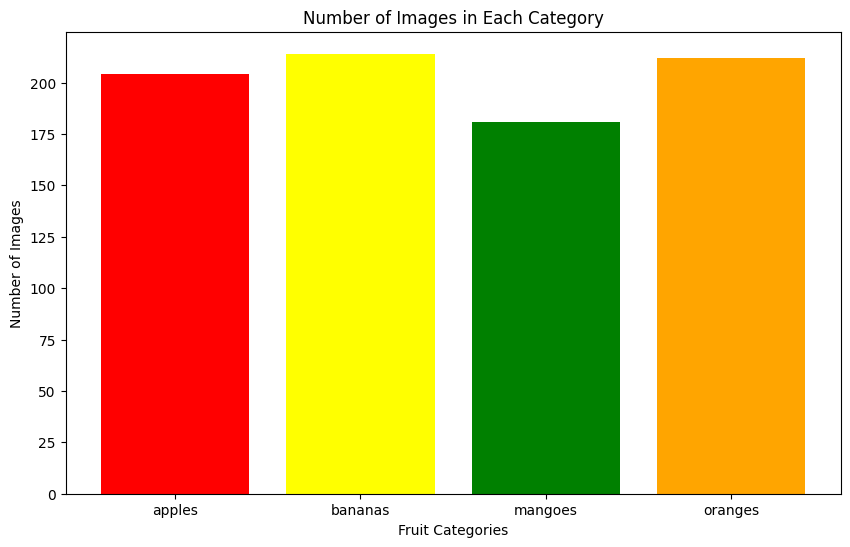

In [51]:
class_names = ['apples', 'bananas', 'mangoes', 'oranges']

data_dir = 'data/'

image_counts = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_counts.append(len(images))

plt.figure(figsize=(10, 6))
plt.bar(class_names, image_counts, color=['red', 'yellow', 'green', 'orange'])
plt.xlabel('Fruit Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.show()

# Training CNN
In the following section will be trained a CNN to classify the fruits.

### Preprocessing
Here the image size, zoom and shear range as well as the model parameters like target size and batch size are set at appropriate value

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

train_generator = datagen.flow_from_directory(
    'data/',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'data/',
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 731 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


### Model Generation
A sequential model is generated with 4 convolution layers along side max pooling and 3 dense layers out of which tbeh last is the output layer.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [14]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)))
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Fourth Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes for fruits

c:\Users\mughe\anaconda3\envs\ml1\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    11,076,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,449,284 (43.68 MB)

 Trainable params: 11,449,284 (43.68 MB)

 Non-trainable params: 0 (0.00 B)

#### Parameters Adjustment
The model parameters as optimizer ans loss function are set here along with accuracy as the performance validation metric 

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Model Fitting
The model is fitted in the following along with the use of callbacks as early-stopping and model-checkpoint.

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

In [18]:
history = model.fit(
    train_generator,
    # steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    # validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint],
    epochs=40
)

Epoch 1/40


c:\Users\mughe\anaconda3\envs\ml1\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.3334 - loss: 1.3806 - val_accuracy: 0.4500 - val_loss: 1.1640
Epoch 2/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.5389 - loss: 1.0693 - val_accuracy: 0.7250 - val_loss: 0.8535
Epoch 3/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6891 - loss: 0.8311 - val_accuracy: 0.7500 - val_loss: 0.7006
Epoch 4/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6996 - loss: 0.7505 - val_accuracy: 0.7000 - val_loss: 0.8837
Epoch 5/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7360 - loss: 0.7415 - val_accuracy: 0.8625 - val_loss: 0.5237
Epoch 6/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7883 - loss: 0.5666 - val_accuracy: 0.7750 - val_loss: 0.4722
Epoch 7/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7700 - loss: 0.5853 - val_accuracy: 0.8375 - val_loss: 0.4121
Epoch 8/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7772 - loss: 0.6272 - val_accuracy: 0.7625 - val_loss: 0.6354
Epo

In [19]:
model.save("model_240x240.h5")

### Model validation
The following step is to validate the model at a validation set to find and plot its validation accuracy

In [20]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')
print(f'Loss Accuracy: {loss * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 543ms/step - accuracy: 0.8797 - loss: 0.2398
Validation Accuracy: 90.00%
Loss Accuracy: 20.48%


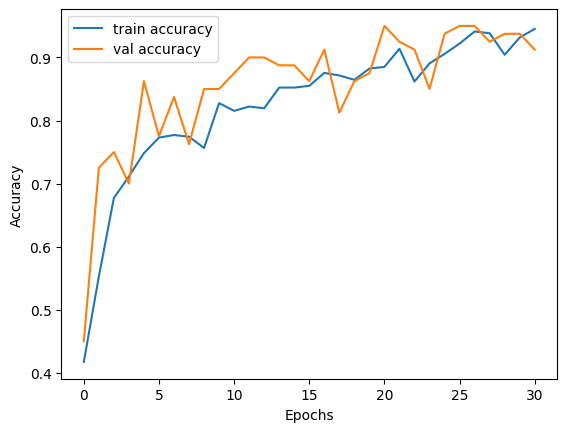

In [21]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
from tensorflow.keras.models import load_model
model = load_model('best_model.keras')

# Model Testing
In the following the model is tested on a set of images that were used neither in the training nor in the validation to validate the model performance on unseen data

### Importing Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model


### Model Loading

In [ ]:
# Load the model
model = load_model('best_model.keras')

### Creating test generator

In [ ]:

# Define class names (adjust based on your actual class names)
class_names = ['apples', 'bananas', 'mangos', 'oranges']

# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'test2/',  # Adjust this to your test folder path
    target_size=(240, 240),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


### Making predictions

In [ ]:

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Classification report
print('Classification Report')
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
# print('Confusion Matrix')
# print(conf_matrix)


### Displaying Prediction

In [ ]:

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Function to display predictions
def display_predictions(test_generator, y_pred, y_true, class_names):
    plt.figure(figsize=(12, 12))
    num_images = min(len(y_true), 9)
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.axis('off')
        img = test_generator[i][0][0]
        true_label = class_names[y_true[i]]
        pred_label = class_names[y_pred[i]]
        plt.title(f'True: {true_label}\nPred: {pred_label}')
        plt.imshow(img)
    plt.show()

# Display predictions
display_predictions(test_generator, y_pred_classes, y_true, class_names)

### Model testing on a singular image
A function is generated to predict the class of a singular image provide to the model

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Function to predict a single image
def predict_image(model, img_path, class_names):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(240, 240))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_names[predicted_class]

    # Get the true label from the filename
    true_label = None
    for class_name in class_names:
        if class_name in os.path.basename(img_path).lower():
            true_label = class_name
            break

    # Display the image with predicted and true labels
    plt.figure(figsize=(4, 4))
    plt.axis('off')
    plt.title(f'True: {true_label}\nPred: {predicted_label}')
    plt.imshow(img)
    plt.show()

# Load the model
model = load_model('best_model.keras')

# Define class names (adjust based on your actual class names)
class_names = ['apple', 'banana', 'mango', 'orange']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


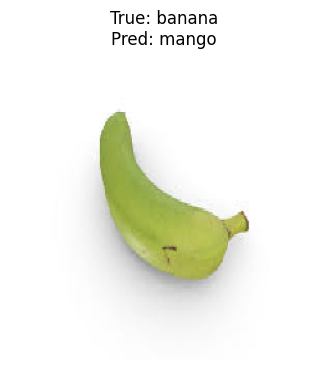

In [111]:

# img_path = 'test\\apples\\apple.jpeg'
# img_path = 'test\\mangoes\\mango1.jpeg'
# img_path = 'test\\bananas\\banana (2).jpeg'
user_input = input("Enter image name: ")

img_path = os.path.join("test", user_input)

predict_image(model, img_path, class_names)

### Testing model on entire folder

In [ ]:
folder_path = 'test/'
img_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg'))]

for img_file in img_files:
    img_path = os.path.join(folder_path, img_file)
    predict_image(model, img_path, class_names)